In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes = pd.read_csv('dataset/diabetes_processed.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [7]:
diabetes_corr = diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.104428,0.069769,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.196435,0.697793,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.208295,0.128439,0.281063,-0.002763,0.324595,0.166074
SkinThickness,0.104428,0.196435,0.208295,1.000000,0.203299,0.522159,0.077395,0.158825,0.220678
Insulin,0.069769,0.697793,0.128439,0.203299,1.000000,0.268167,0.134505,0.215751,0.357815
BMI,0.021546,0.231400,0.281063,0.522159,0.268167,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.077395,0.134505,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.158825,0.215751,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.220678,0.357815,0.312249,0.173844,0.238356,1.000000


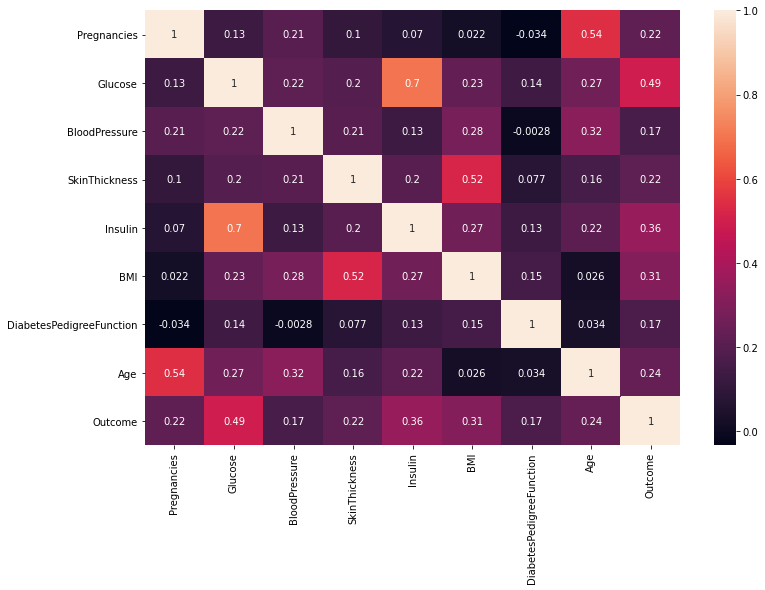

In [9]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(diabetes_corr, annot = True)
plt.show()

In [11]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = diabetes['Age']

In [13]:
features_names = X.columns
features_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

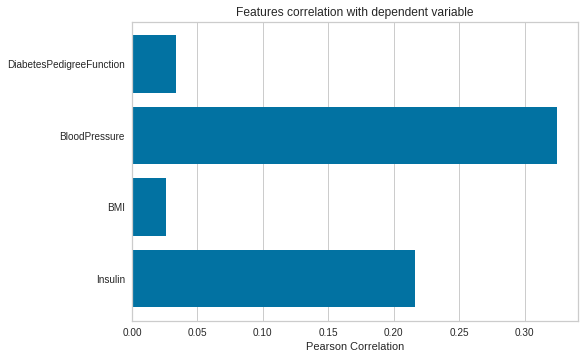

In [17]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels= features_names, method= 'pearson')
visualizer.fit(X,Y)
visualizer.poof()

In [20]:
visualizer.scores_
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [22]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                       'Scores' : visualizer.scores_})
score_df

,Feature_names,Scores
0,Insulin,0.215751
1,BMI,0.025744
2,BloodPressure,0.324595
3,DiabetesPedigreeFunction,0.033561


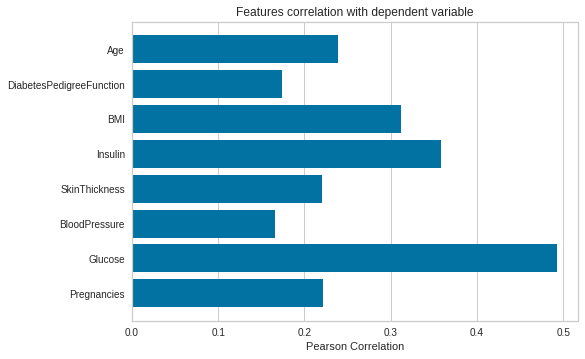

In [27]:
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']
features_names = X.columns
features_names
visualizer = FeatureCorrelation(labels= features_names, method= 'pearson')
visualizer.fit(X,Y)
visualizer.poof()

/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


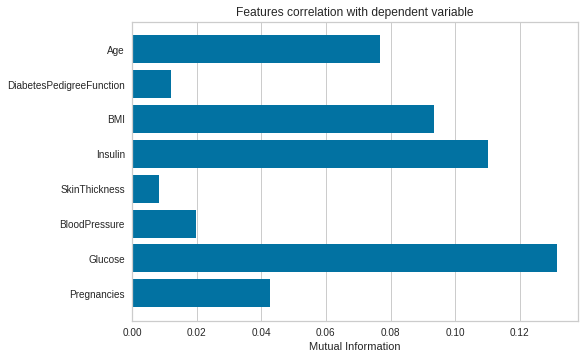

In [35]:
discrete_features = [False for _  in range(len(features_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(method= 'mutual_info-classification', labels= features_names)
visualizer.fit(X, Y, discrete_features= discrete_features, random_state= 0)
visualizer.poof()

/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


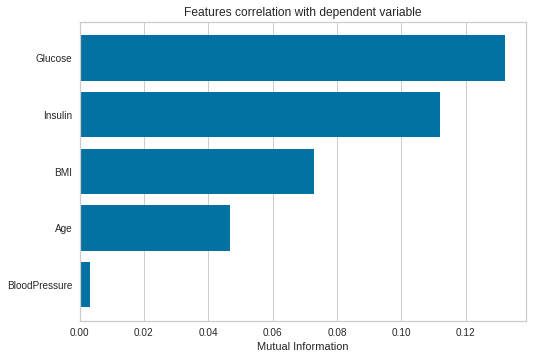

In [36]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

visualizer = FeatureCorrelation(method= 'mutual_info-classification', feature_names= feature_to_plot, sort = True)
visualizer.fit(X, Y, random_state= 0)
visualizer.poof()